C=1时，对偶模型的最优解alpha为：[[-0.25  0.25]]
C=1时，支持向量为：
[[1. 1.]
 [3. 3.]]
C=0.2时，对偶模型的最优解alpha为：[[-0.2  0.2]]
C=0.2时，支持向量为：
[[1. 1.]
 [3. 3.]]


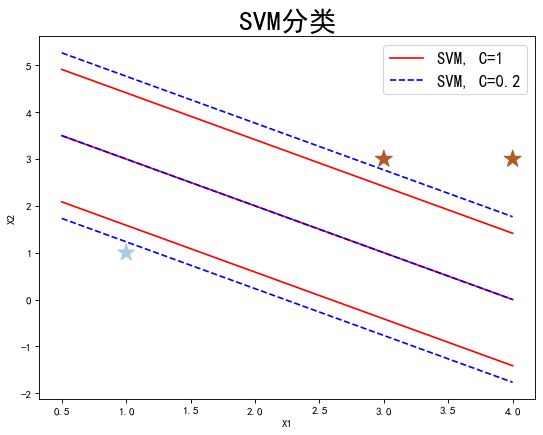

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']

# 样本数据
X = np.array([[3, 3], [4, 3], [1, 1]])
y = np.array([1, 1, -1])

# 创建SVM分类器对象
C = [1, 0.2]
clf_list = []

fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

for c in C:
    clf = svm.SVC(kernel='linear', C=c)
    clf.fit(X, y)
    clf_list.append(clf)

# 绘制SVM超平面及间隔边界
for clf, c, color, linestyle in zip(clf_list, C, ['red', 'blue'], ['-', '--']):
    # 获取SVM超平面
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(0.5, 4)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # 获取SVM间隔边界
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.abs(a) * margin
    yy_up = yy + np.abs(a) * margin

    # 绘制SVM超平面及间隔边界
    ax.plot(xx, yy, label='SVM, C={}'.format(c), color=color, linestyle=linestyle)
    ax.plot(xx, yy_down, color=color, linestyle=linestyle)
    ax.plot(xx, yy_up, color=color, linestyle=linestyle)

    # 输出对偶模型的最优解alpha
    print('C={}时，对偶模型的最优解alpha为：{}'.format(c, clf.dual_coef_))
    # 输出支持向量
    print('C={}时，支持向量为：\n{}'.format(c, clf.support_vectors_))

# 绘制样本数据
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='*', s=250)

# 添加图例
ax.legend(loc='best',fontsize=15)

# 添加坐标轴标签和标题
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('SVM分类',fontsize=25)


plt.show()


C=1时，对偶模型的最优解alpha为：[[-0.25  0.25]]
C=1时，支持向量为：
[[1. 1.]
 [3. 3.]]
C=0.2时，对偶模型的最优解alpha为：[[-0.2  0.2]]
C=0.2时，支持向量为：
[[1. 1.]
 [3. 3.]]


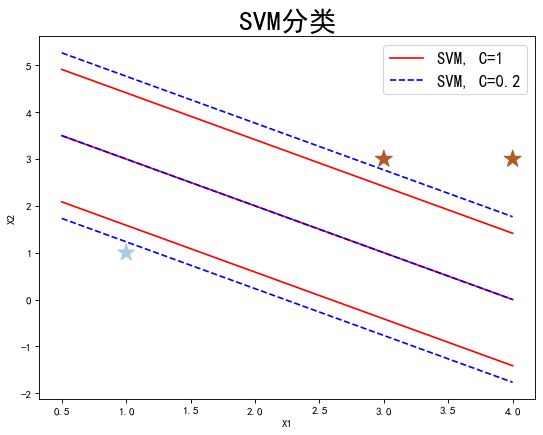

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']

# 样本数据
X = np.array([[3, 3], [4, 3], [1, 1]])
y = np.array([1, 1, -1])

# 创建SVM分类器对象
C = [1, 0.2]
clf_list = []

fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

for c in C:
    clf = svm.SVC(kernel='linear', C=c)
    clf.fit(X, y)
    clf_list.append(clf)

# 绘制SVM超平面及间隔边界
for clf, c, color, linestyle in zip(clf_list, C, ['red', 'blue'], ['-', '--']):
    # 获取SVM超平面
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(0.5, 4)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # 获取SVM间隔边界
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.abs(a) * margin
    yy_up = yy + np.abs(a) * margin

    # 绘制SVM超平面及间隔边界
    ax.plot(xx, yy, label='SVM, C={}'.format(c), color=color, linestyle=linestyle)
    ax.plot(xx, yy_down, color=color, linestyle=linestyle)
    ax.plot(xx, yy_up, color=color, linestyle=linestyle)

    # 输出对偶模型的最优解alpha
    print('C={}时，对偶模型的最优解alpha为：{}'.format(c, clf.dual_coef_))
    # 输出支持向量
    print('C={}时，支持向量为：\n{}'.format(c, clf.support_vectors_))

# 绘制样本数据
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='*', s=250)

# 添加图例
ax.legend(loc='best',fontsize=15)

# 添加坐标轴标签和标题
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('SVM分类',fontsize=25)


plt.show()


待分类的点的分类结果为： [-1. -1.  1.  1.]


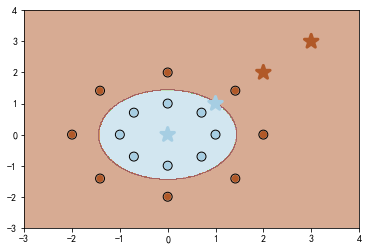

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# 读取数据
data = np.loadtxt('excer_svm.csv', delimiter=',', skiprows=1)

# 特征和标签
X = data[:, :2]
y = data[:, 2]

# 创建SVM分类器对象
clf = svm.SVC(kernel='rbf', gamma=0.5, C=1)
clf.fit(X, y)

# 可视化样本空间的分类结果
# 创建网格数据
xx, yy = np.meshgrid(np.linspace(-3, 4, 500), np.linspace(-3, 4, 500))
# 预测网格数据的标签
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制样本数据
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# 绘制分类边界
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

# 绘制支持向量
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', edgecolors='k')


# 绘制待分类的点
test_points = np.array([[0, 0], [1, 1], [2, 2], [3, 3]])
test_results = clf.predict(test_points)
plt.scatter(test_points[:, 0], test_points[:, 1], c=test_results, cmap=plt.cm.Paired, marker='*', s=200, linewidths=3)

# 输出预测结果
print('待分类的点的分类结果为：', test_results)
plt.show()
